<a href="https://colab.research.google.com/github/LDBreton/Modelacion2/blob/main/proyecto3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# Importar las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Cargar el archivo de datos
from google.colab import files
uploaded = files.upload()

# Asumiendo que el nombre del archivo es 'Casos_Diarios_Estado_Nacional_Confirmados_20230625.csv',
# reemplaza el nombre del archivo según corresponda
nombre_archivo = list(uploaded.keys())[0]
datos = pd.read_csv(nombre_archivo)


Saving Casos_Diarios_Estado_Nacional_Confirmados_20230625.csv to Casos_Diarios_Estado_Nacional_Confirmados_20230625 (1).csv


In [43]:
# Filtrar los datos para la Ciudad de México
datos_cdmx = datos[datos['nombre'] == 'DISTRITO FEDERAL']

# Extraer los datos de casos diarios y calcular los acumulados
fechas = datos_cdmx.columns[3:]  # Excluir columnas no relacionadas con las fechas
casos_diarios = datos_cdmx[fechas].values.flatten()  # Aplanar para obtener una serie de casos diarios
casos_acumulados = casos_diarios.cumsum()  # Calcular casos acumulados

# Crear DataFrame para análisis
df_cdmx = pd.DataFrame({'Fecha': fechas,
                        'Casos_diarios': casos_diarios,
                        'Casos_acumulados': casos_acumulados})
# Asegurarte de que la columna 'Fecha' está en formato de fecha
df_cdmx['Fecha'] = pd.to_datetime(df_cdmx['Fecha'], format='%d-%m-%Y')
# Aplicar suavizado con promedios móviles a los casos acumulados
df_cdmx['Casos_acumulados_suavizados'] = df_cdmx['Casos_acumulados'].rolling(window=7, center=True).mean()
df_cdmx['Casos_diarios_suavizados']    = df_cdmx['Casos_diarios'].rolling(window=7, center=True).mean()

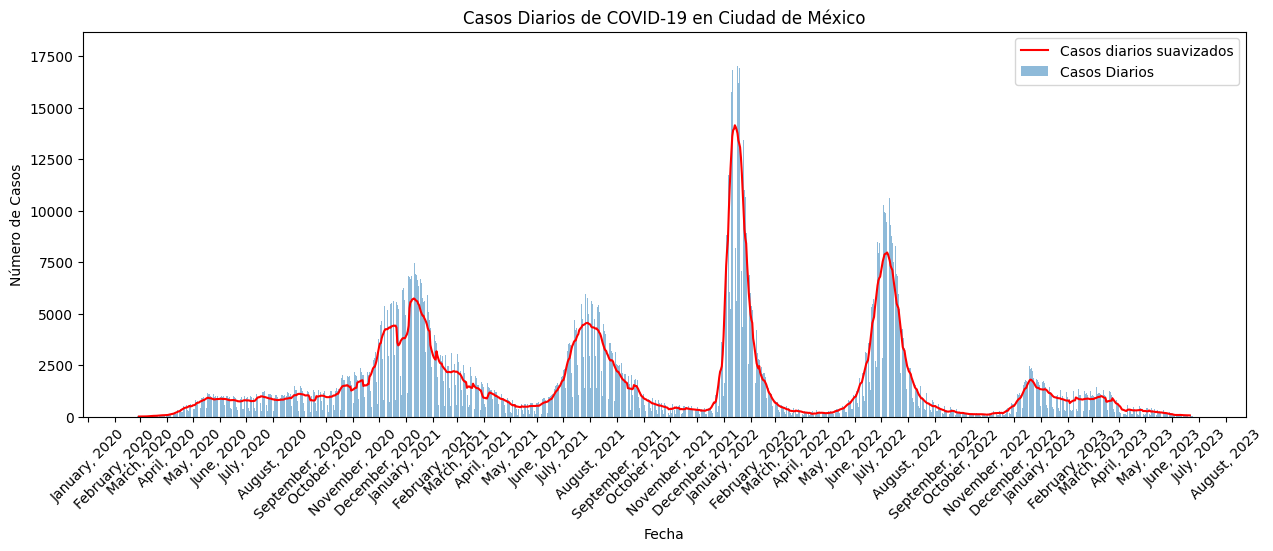

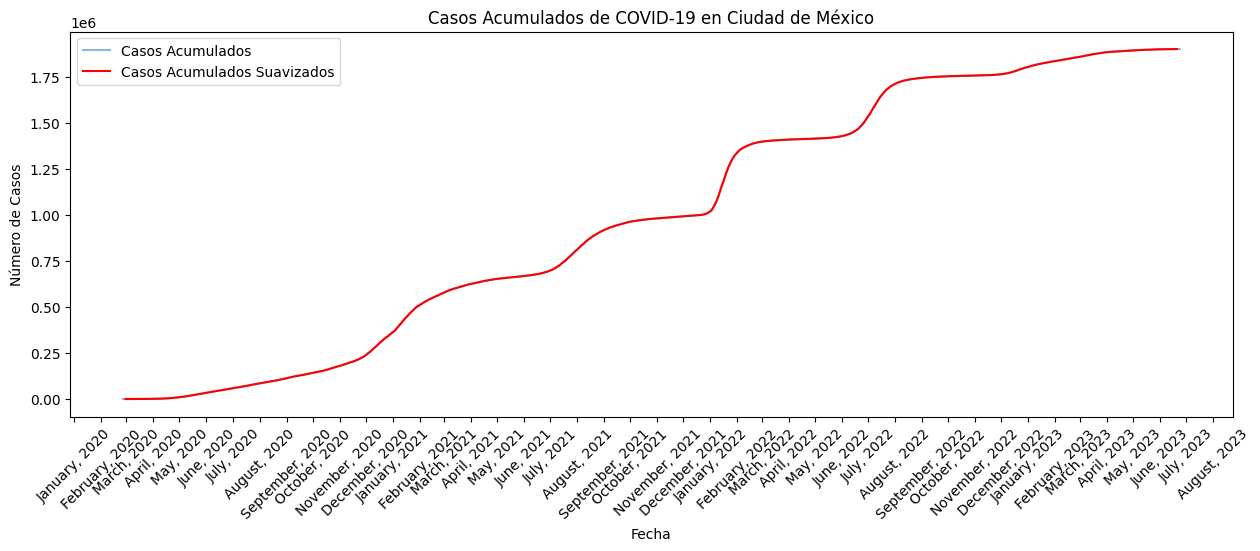

In [49]:

# Continuar con el análisis o visualización utilizando df_cdmx
# Gráfico para Casos Diarios
plt.figure(figsize=(15, 5))
plt.bar(df_cdmx['Fecha'], df_cdmx['Casos_diarios'], label='Casos Diarios', alpha=0.5)
plt.plot(df_cdmx['Fecha'], df_cdmx['Casos_diarios_suavizados'], label='Casos diarios suavizados', color='red')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B, %Y'))
plt.xticks(rotation=45)
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Número de Casos')
plt.title('Casos Diarios de COVID-19 en Ciudad de México')
plt.show()

# Gráfico para Casos Acumulados
plt.figure(figsize=(15, 5))
plt.plot(df_cdmx['Fecha'], df_cdmx['Casos_acumulados'], label='Casos Acumulados', alpha=0.5)
plt.plot(df_cdmx['Fecha'], df_cdmx['Casos_acumulados_suavizados'], label='Casos Acumulados Suavizados', color='red')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B, %Y'))
plt.xticks(rotation=45)
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Número de Casos')
plt.title('Casos Acumulados de COVID-19 en Ciudad de México')
plt.show()


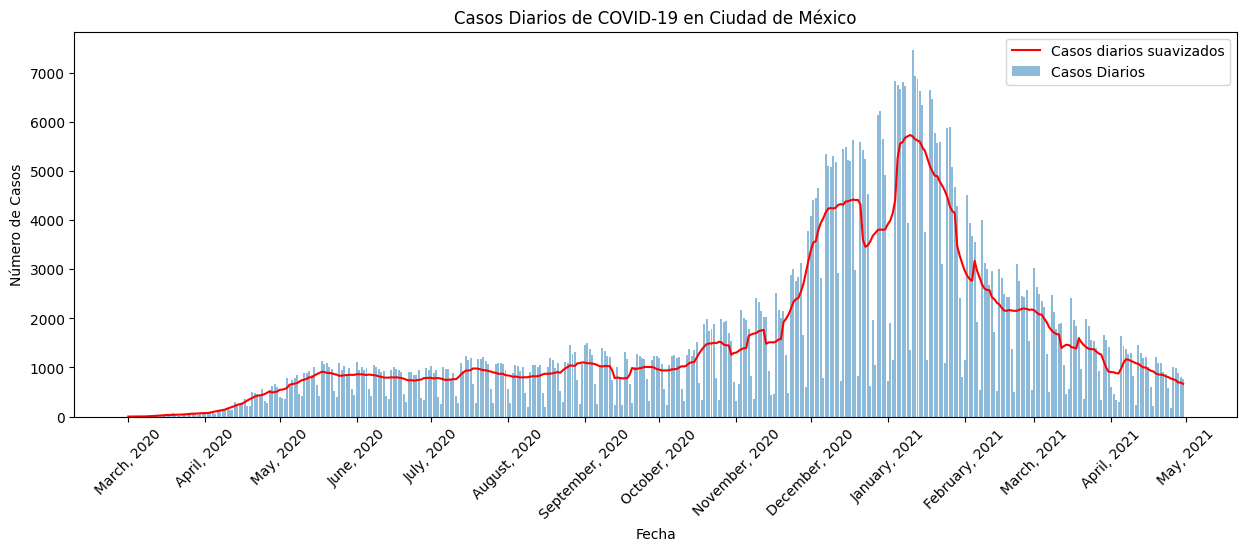

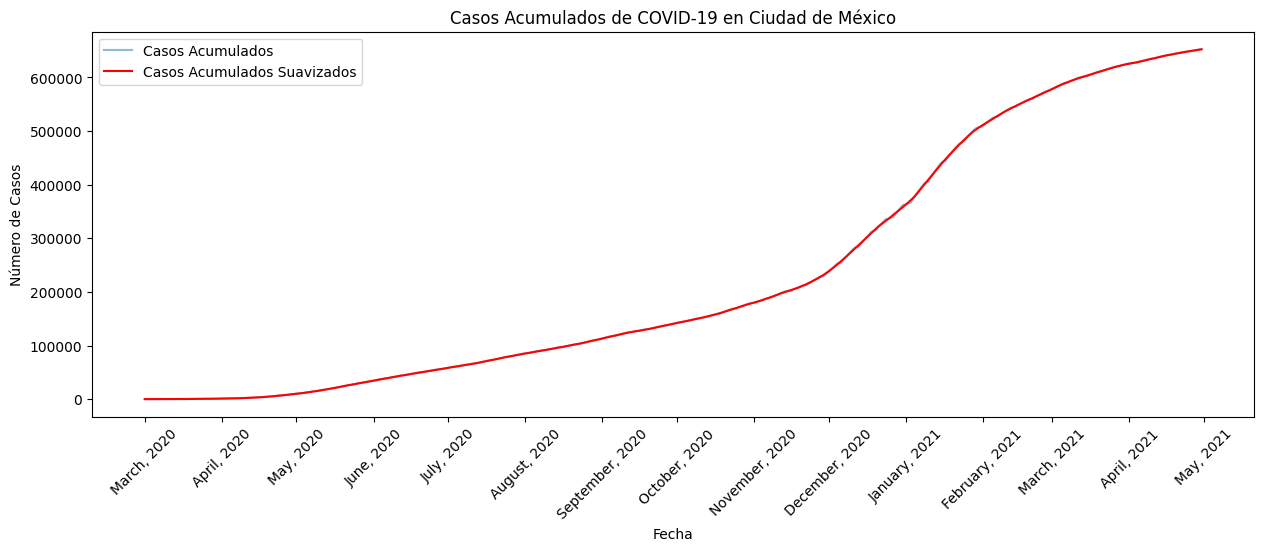

In [50]:
# Definir las fechas de inicio y fin de tu periodo de interés
fecha_inicio = pd.to_datetime('2020-03-01')  # Por ejemplo, 1 de marzo de 2020
fecha_fin = pd.to_datetime('2021-04-30')     # Por ejemplo, 31 de julio de 2020

# Filtrar el DataFrame para incluir solo las filas dentro del rango de fechas
df_cdmx_filtrado = df_cdmx[(df_cdmx['Fecha'] >= fecha_inicio) & (df_cdmx['Fecha'] <= fecha_fin)]

# Continuar con el análisis o visualización utilizando df_cdmx
# Gráfico para Casos Diarios
plt.figure(figsize=(15, 5))
plt.bar(df_cdmx_filtrado['Fecha'], df_cdmx_filtrado['Casos_diarios'], label='Casos Diarios', alpha=0.5)
plt.plot(df_cdmx_filtrado['Fecha'], df_cdmx_filtrado['Casos_diarios_suavizados'], label='Casos diarios suavizados', color='red')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B, %Y'))
plt.xticks(rotation=45)
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Número de Casos')
plt.title('Casos Diarios de COVID-19 en Ciudad de México')
plt.show()

# Gráfico para Casos Acumulados
plt.figure(figsize=(15, 5))
plt.plot(df_cdmx_filtrado['Fecha'], df_cdmx_filtrado['Casos_acumulados'], label='Casos Acumulados', alpha=0.5)
plt.plot(df_cdmx_filtrado['Fecha'], df_cdmx_filtrado['Casos_acumulados_suavizados'], label='Casos Acumulados Suavizados', color='red')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B, %Y'))
plt.xticks(rotation=45)
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Número de Casos')
plt.title('Casos Acumulados de COVID-19 en Ciudad de México')
plt.show()


Parámetros óptimos:
K (capacidad de carga) = 815031.8621618825
beta (tasa de crecimiento) = 0.01557789889581869
y0 (número inicial de casos) = 5878.84044504239


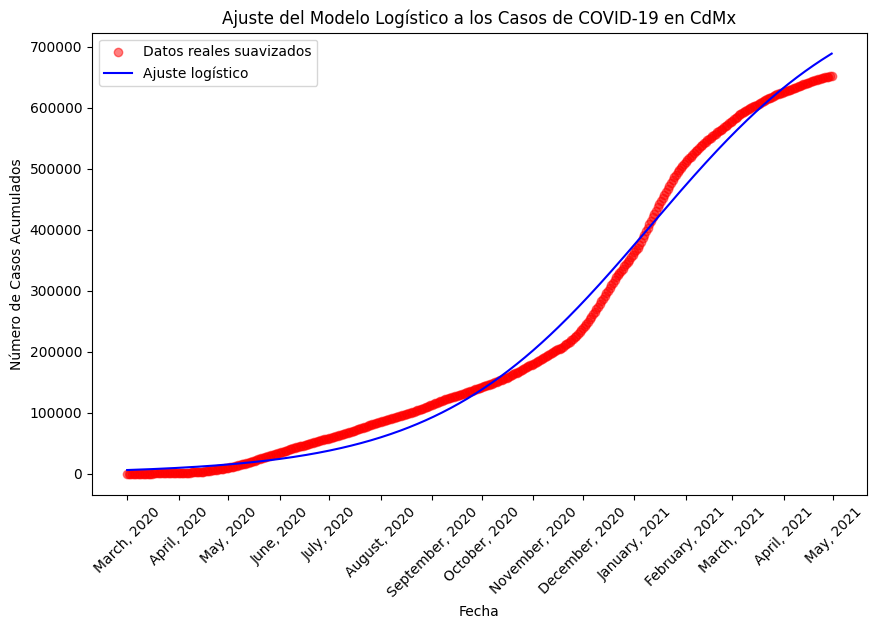

In [57]:
from scipy.optimize import minimize

# Función del modelo logístico
def modelo_logistico(t, K, beta, y0):
    return K / (1 + ((K - y0) / y0) * np.exp(-beta * t))

# Función objetivo para minimizar (función de costo)
def funcion_objetivo(params, t, y):
    K, beta, y0 = params
    y_pred = modelo_logistico(t, K, beta, y0)
    # Usamos la suma de cuadrados de los residuos como función de costo
    return np.sum((y - y_pred) ** 2)

# Preparar los datos para la optimización
t = np.arange(len(df_cdmx_filtrado))  # Tiempo
y = df_cdmx_filtrado['Casos_acumulados_suavizados'].values  # Casos acumulados

# Estimaciones iniciales de los parámetros
params_iniciales = np.array([max(y), 0.1, y[0]])

# Uso de minimize con el método Nelder-Mead
parametros_optimos = minimize(funcion_objetivo, params_iniciales, args=(t, y), method='Nelder-Mead')

K_opt, beta_opt, y0_opt = parametros_optimos.x
print("Parámetros óptimos:")
print("K (capacidad de carga) =", K_opt)
print("beta (tasa de crecimiento) =", beta_opt)
print("y0 (número inicial de casos) =", y0_opt)

# Usar el modelo logístico con los parámetros óptimos para predecir los casos
y_pred = modelo_logistico(t, K_opt, beta_opt, y0_opt)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(df_cdmx_filtrado['Fecha'], y, color='red', label='Datos reales suavizados', alpha=0.5)
plt.plot(df_cdmx_filtrado['Fecha'], y_pred, label='Ajuste logístico', color='blue')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B, %Y'))
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Número de Casos Acumulados')
plt.title('Ajuste del Modelo Logístico a los Casos de COVID-19 en CdMx')
plt.xticks(rotation=45)
plt.show()
